Feedback dari anda diperlukan! bantu kami dalam [meningkatkan modul ini](https://forms.gle/pWJd6y4hY4KWMcno6).

In [1]:
# untuk keperluan notebook ini
# agar plotnya ngga kegedean
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

# Statistika Deskriptif

Ini statistika yang berpusat pada menjelaskan data, ketimbang mengambil kesimpulan tentang data. Untuk bagian ini, (dari sekian banyak package yang menawarkan kemampuan yang sejenis), kita akan fokus menggunakan [Hmisc](https://cran.r-project.org/web/packages/Hmisc/Hmisc.pdf), [pastecs](https://cran.r-project.org/web/packages/pastecs/pastecs.pdf), dan [TSA](https://cran.r-project.org/web/packages/TSA/TSA.pdf).

In [2]:
# input dataset yang sudah ada, kita memakai "Motor Trend Car Road Tests"
attach(mtcars)
mtcars

# bagi yang penasaran tapi mager nyari, ini maksud kolom-kolom di dataset
# mpg  = Miles/(US) gallon
# cyl  = Number of cylinders
# disp = Displacement (cu.in.)
# hp   = Gross horsepower
# drat = Rear axle ratio
# wt   = Weight (1000 lbs)
# qsec = 1/4 mile time
# vs   = Engine (0 = V-shaped, 1 = straight)
# am   = Transmission (0 = automatic, 1 = manual)
# gear = Number of forward gears
# carb = Number of carburetors 

# untuk seterusnya, jika kita ingin fokus ke satu/dua data saja
# kita bakal gunakan data mpg dan wt. agar tidak capek nulis,
dataX = mtcars$wt
dataY = mtcars$mpg

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Sari numerik yang paling sederhana setidaknya memiliki informasi tentang nilai mean, minimum, maksimum, dan nilai-nilai kuartil. sari numerik yang sederhana ini, dapat menggambarkan keadaan data jika kita visualisasikan dalam bentuk box-plot (well, kecuali kemampuan visualisasi anda diatas manusia normal).

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.513   2.581   3.325   3.217   3.610   5.424 

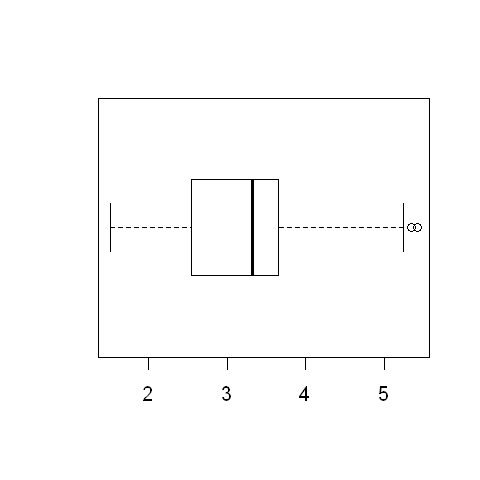

In [3]:
# mencetak sari numerik setiap kolom di dataset: summary(mtcars)
summary(dataX)

#cetak boxplot
boxplot(dataX, horizontal = T)

In [4]:
# sekarang kita gunakan package pastecs untuk sari numerik
# yang lebih detail tentang... why not semua kolom dataset?
library(pastecs)
stat.desc(mtcars)

Warning message:
"package 'pastecs' was built under R version 3.3.3"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
nbr.val,32.0000000,32.0000000,3.200000e+01,32.0000000,32.00000000,32.0000000,32.0000000,32.00000000,32.00000000,32.0000000,32.0000000
nbr.null,0.0000000,0.0000000,0.000000e+00,0.0000000,0.00000000,0.0000000,0.0000000,18.00000000,19.00000000,0.0000000,0.0000000
nbr.na,0.0000000,0.0000000,0.000000e+00,0.0000000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000
min,10.4000000,4.0000000,7.110000e+01,52.0000000,2.76000000,1.5130000,14.5000000,0.00000000,0.00000000,3.0000000,1.0000000
max,33.9000000,8.0000000,4.720000e+02,335.0000000,4.93000000,5.4240000,22.9000000,1.00000000,1.00000000,5.0000000,8.0000000
range,23.5000000,4.0000000,4.009000e+02,283.0000000,2.17000000,3.9110000,8.4000000,1.00000000,1.00000000,2.0000000,7.0000000
sum,642.9000000,198.0000000,7.383100e+03,4694.0000000,115.09000000,102.9520000,571.1600000,14.00000000,13.00000000,118.0000000,90.0000000
median,19.2000000,6.0000000,1.963000e+02,123.0000000,3.69500000,3.3250000,17.7100000,0.00000000,0.00000000,4.0000000,2.0000000
mean,20.0906250,6.1875000,2.307219e+02,146.6875000,3.59656250,3.2172500,17.8487500,0.43750000,0.40625000,3.6875000,2.8125000
SE.mean,1.0654240,0.3157093,2.190947e+01,12.1203173,0.09451874,0.1729685,0.3158899,0.08909831,0.08820997,0.1304266,0.2855297


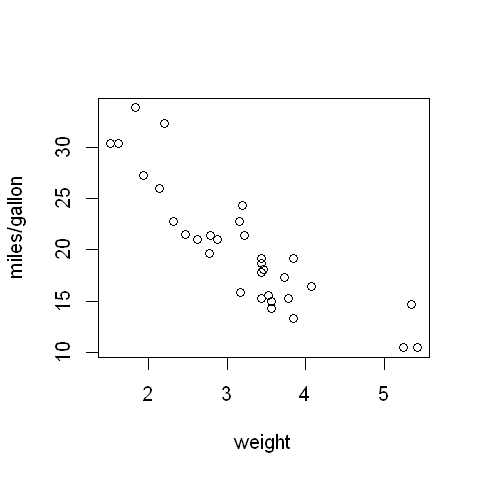

In [5]:
# coba cetak scatterplot
plot(dataX, dataY, xlab = "weight", ylab = 'miles/gallon')